In [1]:
import nltk
import pickle5 as pickle
import carmen
from pyarrow import json
import jsonlines
import json_lines
import spacy
import tokenizer
from json2parquet import convert_json
import csv
import ijson
from nltk.tokenize import word_tokenize
import gensim

from functools import partial

import os
import pyarrow.parquet as pq

In [2]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
# %matplotlib inline"

In [3]:
from gensim.models import CoherenceModel
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
nltk.download('punkt')

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt


# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import nltk
from nltk.corpus import stopwords

from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import gensim
from gensim import corpora
from pprint import pprint
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

import datetime
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import webcolors
import folium
plt.rcParams.update({'figure.figsize': (30, 30), 'figure.dpi': 120})

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True Removes punctuations
        
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

# Join the tweet back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

def carmenFormat(tweet_id, text):
    tweetFormatList = []
    carmenTweet = {"tweet": {"text": text, "id": tweet_id}}
    #print(carmenTweet)
    return carmenTweet

        #for tweets in row['text'][index]:
        #tweetFormatList.append({"tweet": {"id": row[],"text": tweet}})
    #for index, row in df.iterrows():

    #return tweetFormatList

def twitterLocation(list):
    tweetList = []
    for tweet in list:
        #print("tweeeet", tweet)
        tweetLocation = resolver.resolve_tweet(tweet)
        tweetList.append(tweetLocation)
    return tweetList
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

def corpusStemmed(x):
    corpus = []
    for tweets in x['stemmed']:
        corpus.append(x['id2word_stemmed'].doc2bow(tweets))
    
    return corpus

def createLDAModel(x):
    mallet_path = '/Users/austingerner/mallet/bin/mallet' # update this path
    ldaMalletModel = gensim.models.wrappers.LdaMallet(mallet_path, corpus=x['hashtag_text'], num_topics=5, id2word=x['hashtags'])

    #for tweets in range(len(x)):
     #print("x", x['corpus_stemmed'][tweets], tweets, x['hashtags'][tweets])
      #ldaMalletModel = gensim.models.wrappers.LdaMallet(mallet_path, corpus=x['corpus_stemmed'][tweets], num_topics=5, id2word=x['id2word_stemmed'][tweets])
       # ldaMalletModel.save("{}-{}.txt".format(tweets, x['hashtags'][tweets]))
    return ldaMalletModel


def lemmatiziation(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent))
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     print("tweets_out", tweets_out)
    return tweets_out

def applyLemminzation(x):
#     print("x", x)
    tweet_list = pd.Series(lemmatiziation(x, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))
    print("tweet_list", tweet_list)

    return tweet_list

def applyStemmer(x):
    for tweets in x:
#         print(tweets, "tweets")
        for tweet in tweets:
            stemmer.stem(tweet)
    print("Stemmed", x, tweets)
    return x
def stemmerCorporaDictionary(x):
    corpora.Dictionary(x)

    print("corporadict", x)
    return x
        #[stemmer.stem(y) for y in x]


# Geolocation

In [7]:

tweets_distribution_sentiment_geolocation_df = pd.read_pickle("/Users/austingerner/Documents/gw/capstone/modeling/lda/data/tweet_topic_distribution_location.pkl")

tweets_sentiment_analysis_df = pd.read_pickle("/Users/austingerner/Documents/gw/capstone/modeling/sentiment/data/sentiment_analysis_vader_results_capstone.pkl")




In [17]:
tweets_distribution_sentiment_geolocation_df.head()

city                   country              county  \
0  Norwalk   United States of America  Fairfield County     
1  New York  United States of America  New York County      
2  Atlanta   United States of America  Fulton County        
3  Manteca   United States of America  San Joaquin County   
4  New York  United States of America  New York County      

                    id lang   latitude   longitude        state  \
0  1252570534250008577  en   41.113660 -73.407654   Connecticut   
1  1303414058255675392  en   40.773041 -73.957489   New York      
2  1248188906148892673  en   33.747421 -84.412048   Georgia       
3  1282149524442472448  en   37.799170 -121.232189  California    
4  1308399742993473538  en   40.773041 -73.957489   New York      

   created_at_month  topic_id  prevalence  \
0  4                 33        0.015782     
1  9                 11        0.010290     
2  4                 65        0.019514     
3  7                 0         0.010181     
4  9                 60        0.014944     

                                                                                    tidy_tweet  \
0  #gasb proposal postpones almost statement implementation guide effective dates fiscal years   
1  will lead global procurement supply #covid vaccines #covax world health organization          
2  looking important information ease capacity constraints deal with patient flow issues         
3  #quarantine having watch shows normally wouldn watch #closeenoughmax #sip #streaming #covid   
4  from fauci direct listen experts politicians might survive pandemic infected from             

                                                                                           tokens_no_stop  \
0  [gasb, proposal, postpones, almost, statement, implementation, guide, effective, dates, fiscal, years]   
1  [lead, global, procurement, supply, covid, vaccines, covax, world, health, organization]                 
2  [looking, important, information, ease, capacity, constraints, deal, patient, flow, issues]              
3  [quarantine, watch, shows, normally, watch, closeenoughmax, sip, streaming, covid]                       
4  [fauci, direct, listen, experts, politicians, might, survive, pandemic, infected]                        

   negative  neutral  positive  compound  sentiment  \
0  0.148     0.634    0.218     0.2500    1           
1  0.000     1.000    0.000     0.0000    0           
2  0.000     0.677    0.323     0.5106    1           
3  0.000     1.000    0.000     0.0000    0           
4  0.242     0.758    0.000    -0.4939   -1           

                                                                                      lemmatized  
0  [proposal, postpone, almost, statement, implementation, guide, effective, date, fiscal, year]  
1  [lead, global, procurement, supply, covid, vaccine, covax]                                     
2  [look, important, information, ease, capacity, constraint, deal, patient, flow, issue]         
3  [show, normally, watch, sip, streaming, covid]                                                 
4  [direct, listen, expert, politician, may, survive, pandemic, infect]

In [8]:
covid_hashtags_full_preprocessed_geolocation_df = tweets_distribution_sentiment_geolocation_df.copy()
covid_hashtags_full_preprocessed_geolocation_df = covid_hashtags_full_preprocessed_geolocation_df.drop(columns = ['created_at', 'text_x', 'tidy_tweet', 'tokens_no_stop', 'stemmed', 'tidy_tweet_tokens', 'hashtags', 'new_tweets_corpus', 'max_count', 'total_docs', 'no_stop_joined'])
tweets_distribution_sentiment_geolocation_df = pd.merge(covid_hashtags_full_preprocessed_geolocation_df, tweets_sentiment_analysis_df, how='left', left_on=['id', 'topic_id'], right_on = ['id', 'topic_id'])


In [10]:
tweets_distribution_sentiment_geolocation_df = pd.merge(covid_hashtags_full_preprocessed_geolocation_df, tweets_sentiment_analysis_df, how='left', left_on=['id', 'topic_id'], right_on = ['id', 'topic_id'])




In [11]:
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('United States', "United States of America")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Tanzania', "United Republic of Tanzania")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Democratic Republic of Congo', "Democratic Republic of the Congo")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Congo', "Republic of the Congo")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Lao', "Laos")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Syrian Arab Republic', "Syria")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Serbia', "Republic of Serbia")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('Czechia', "Czech Republic")
tweets_distribution_sentiment_geolocation_df.country = tweets_distribution_sentiment_geolocation_df.country.str.replace('UAE', "United Arab Emirates")


In [13]:

tweets_distribution_sentiment_geolocation_df.latitude = tweets_distribution_sentiment_geolocation_df.latitude.replace('', np.nan)
tweets_distribution_sentiment_geolocation_df.longitude = tweets_distribution_sentiment_geolocation_df.longitude.replace('', np.nan)


tweets_distribution_sentiment_geolocation_df = tweets_distribution_sentiment_geolocation_df[tweets_distribution_sentiment_geolocation_df['latitude'].notna()]
tweets_distribution_sentiment_geolocation_df = tweets_distribution_sentiment_geolocation_df[tweets_distribution_sentiment_geolocation_df['longitude'].notna()]


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

us_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
us_states_shapes = f'{us_url}/us-states.json'

tm_geolocation_analysis_state_count_by_topic_df = tweets_distribution_sentiment_geolocation_df.copy()


# Build Visualization Tables

In [18]:

tweets_distribution_sentiment_geolocation_df.latitude = tweets_distribution_sentiment_geolocation_df.latitude.replace('', np.nan)
tweets_distribution_sentiment_geolocation_df.longitude = tweets_distribution_sentiment_geolocation_df.longitude.replace('', np.nan)


tweets_distribution_sentiment_geolocation_df = tweets_distribution_sentiment_geolocation_df[tweets_distribution_sentiment_geolocation_df['latitude'].notna()]
tweets_distribution_sentiment_geolocation_df = tweets_distribution_sentiment_geolocation_df[tweets_distribution_sentiment_geolocation_df['longitude'].notna()]


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

us_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
us_states_shapes = f'{us_url}/us-states.json'

tm_geolocation_analysis_state_count_by_topic_df = tweets_distribution_sentiment_geolocation_df.copy()


## US States Data Scrubbing

In [19]:
tm_geolocation_analysis_state_count_by_topic_df = tm_geolocation_analysis_state_count_by_topic_df.dropna(subset=['state'])

tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_count_by_topic_df.loc[tm_geolocation_analysis_state_count_by_topic_df.country == 'United States of America']

tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_us_count_by_topic_df.groupby(['state', 'topic_id', 'sentiment']).count()['longitude']

tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_us_count_by_topic_df.reset_index()

dict = {'state': 'State',
        'topic_id': 'Topic',
        'sentiment': 'Sentiment',
        'longitude': 'Count'}
tm_geolocation_analysis_state_us_count_by_topic_df = tm_geolocation_analysis_state_us_count_by_topic_df.rename(columns = dict)

tm_geolocation_analysis_state_us_count_by_topic_df.to_pickle("data/geolocation-analysis-us-state-count-sentiment-analysis-capstone.pkl")



## Dominant Topics - US States

In [27]:
dominant_topic_us_1 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 27]
dominant_topic_us_1.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count
995    California  27     1          4993 
994    California  27     0          4525 
7514   New York    27     0          3501 
7515   New York    27     1          3155 
993    California  27    -1          2440 
10240  Texas       27     1          2395 
2135   Florida     27     1          2365 
2134   Florida     27     0          2015 
10239  Texas       27     0          1774 
7513   New York    27    -1          1435

In [30]:
dominant_topic_us_1 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 27]

dominant_topic_us_1['Perc%'] = 100 * dominant_topic_us_1['Count']/ dominant_topic_us_1['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 27'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_1,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-30-1181a5478ef7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_1['Perc%'] = 100 * dominant_topic_us_1['Count']/ dominant_topic_us_1['Count'].sum()


In [31]:
dominant_topic_us_1.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
995    California  27     1          4993   6.860213
994    California  27     0          4525   6.217197
7514   New York    27     0          3501   4.810255
7515   New York    27     1          3155   4.334863
993    California  27    -1          2440   3.352477
10240  Texas       27     1          2395   3.290649
2135   Florida     27     1          2365   3.249430
2134   Florida     27     0          2015   2.768542
10239  Texas       27     0          1774   2.437416
7513   New York    27    -1          1435   1.971641

In [32]:
# dominant_topic_us_1.count(axis='Sentiment')
sentiment_dist_1= tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 27].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_1 = sentiment_dist_1.set_index('Sentiment')


In [33]:
sentiment_dist_1['Perc%'] = 100 * sentiment_dist_1['Count']/ sentiment_dist_1['Count'].sum()


In [34]:
sentiment_dist_1.head()

Topic  Count      Perc%
Sentiment                         
-1         1431   13249  18.203677
 0         1431   27422  37.676898
 1         1431   32111  44.119425

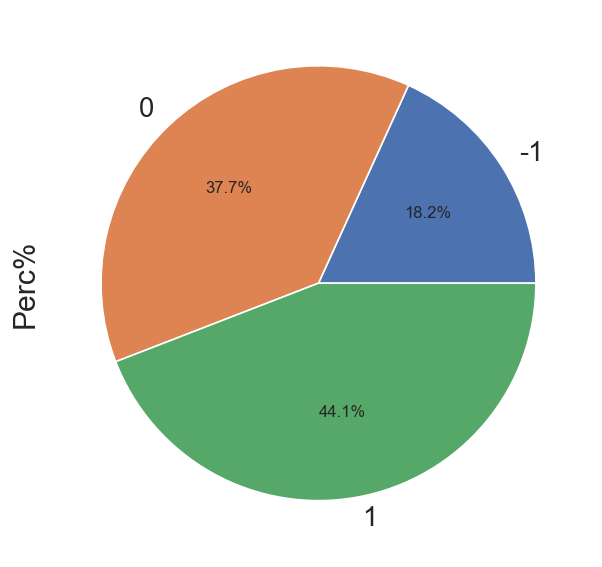

In [35]:

plot = sentiment_dist_1.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [37]:
dominant_topic_us_2 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 66]

dominant_topic_us_2['Perc%'] = 100 * dominant_topic_us_2['Count']/ dominant_topic_us_2['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 74'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_2,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-37-9e74491c90c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_2['Perc%'] = 100 * dominant_topic_us_2['Count']/ dominant_topic_us_2['Count'].sum()


In [38]:
dominant_topic_us_2.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1111   California  66     0          6304   9.170788
7631   New York    66     0          3259   4.741053
10356  Texas       66     0          3025   4.400640
2251   Florida     66     0          2421   3.521967
1112   California  66     1          2278   3.313937
7632   New York    66     1          1810   2.633110
1110   California  66    -1          1616   2.350887
10128  Tennessee   66     0          1436   2.089031
10357  Texas       66     1          1382   2.010474
2479   Georgia     66     0          1335   1.942101

In [39]:
sentiment_dist_2= tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 66].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_2 = sentiment_dist_2.set_index('Sentiment')


In [40]:
sentiment_dist_2.head()

Topic  Count
Sentiment              
-1         3432   9774 
 0         3498   38625
 1         3564   20341

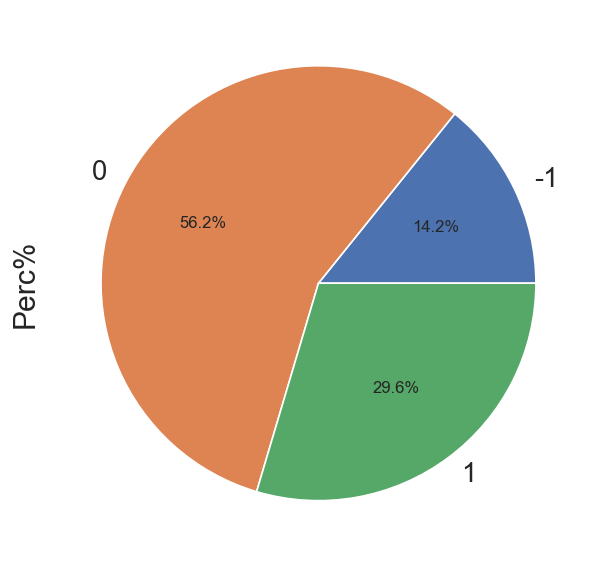

In [41]:
sentiment_dist_2['Perc%'] = 100 * sentiment_dist_2['Count']/ sentiment_dist_2['Count'].sum()

plot = sentiment_dist_2.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [42]:
dominant_topic_us_3 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 17]

dominant_topic_us_3['Perc%'] = 100 * dominant_topic_us_3['Count']/ dominant_topic_us_3['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 68'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_3,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-42-cd18855aac4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_3['Perc%'] = 100 * dominant_topic_us_3['Count']/ dominant_topic_us_3['Count'].sum()


In [43]:
dominant_topic_us_3.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
965    California            17     1          6232   9.531821
7485   New York              17     1          4025   6.156223
964    California            17     0          3767   5.761613
2105   Florida               17     1          2985   4.565547
10210  Texas                 17     1          2932   4.484483
7484   New York              17     0          2276   3.481134
1877   District of Columbia  17     1          1680   2.569554
8848   Pennsylvania          17     1          1605   2.454842
10209  Texas                 17     0          1521   2.326364
2333   Georgia               17     1          1496   2.288127

In [44]:
sentiment_dist_3 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 17].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_3 = sentiment_dist_3.set_index('Sentiment')


In [45]:
sentiment_dist_3['Perc%'] = 100 * sentiment_dist_3['Count']/ sentiment_dist_3['Count'].sum()

sentiment_dist_3.head()

Topic  Count      Perc%
Sentiment                         
-1         850    1915   2.928985 
 0         884    22392  34.248482
 1         901    41074  62.822533

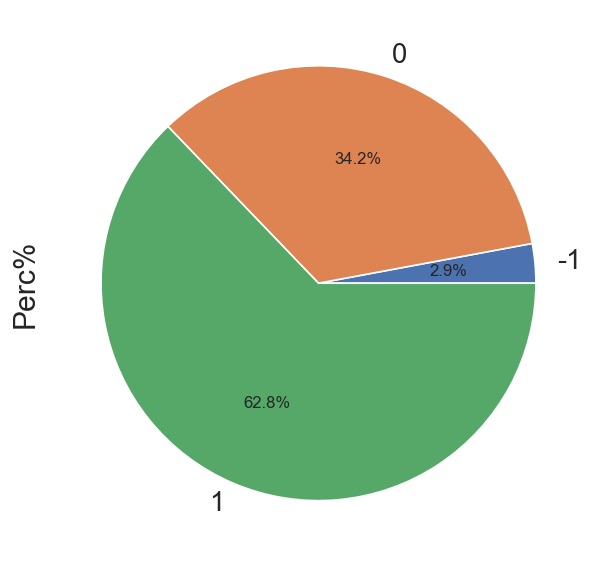

In [46]:

plot = sentiment_dist_3.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [47]:
dominant_topic_us_4 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 26]

dominant_topic_us_4['Perc%'] = 100 * dominant_topic_us_4['Count']/ dominant_topic_us_4['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 18'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_4,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-47-6944eadc0318>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_4['Perc%'] = 100 * dominant_topic_us_4['Count']/ dominant_topic_us_4['Count'].sum()


In [48]:
dominant_topic_us_4.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
991    California            26     0          4117   6.785555
7511   New York              26     0          3694   6.088375
992    California            26     1          3175   5.232970
7512   New York              26     1          2780   4.581939
1903   District of Columbia  26     0          2374   3.912778
10236  Texas                 26     0          1706   2.811794
5003   Massachusetts         26     0          1653   2.724441
1904   District of Columbia  26     1          1518   2.501937
2131   Florida               26     0          1438   2.370082
10237  Texas                 26     1          1381   2.276136

In [49]:
sentiment_dist_4 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 26].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_4 = sentiment_dist_4.set_index('Sentiment')



In [50]:
sentiment_dist_4['Perc%'] = 100 * sentiment_dist_4['Count']/ sentiment_dist_4['Count'].sum()

sentiment_dist_4.head()

Topic  Count      Perc%
Sentiment                         
-1         1378   8084   13.323884
 0         1378   30378  50.068399
 1         1378   22211  36.607717

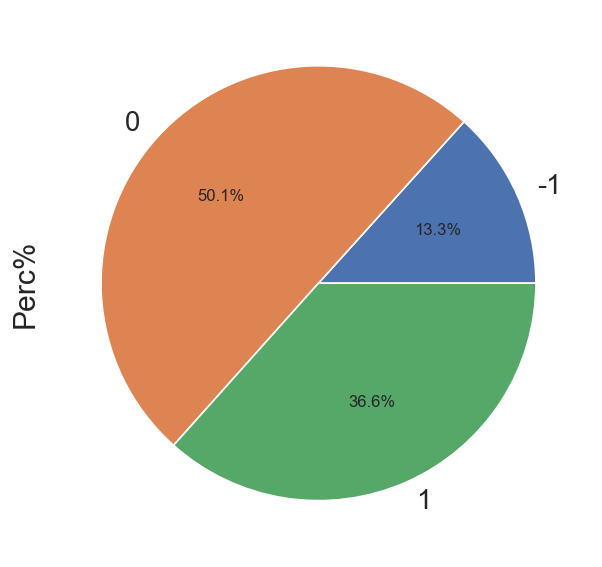

In [51]:

plot = sentiment_dist_4.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [52]:
dominant_topic_us_5 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 23]

dominant_topic_us_5['Perc%'] = 100 * dominant_topic_us_5['Count']/ dominant_topic_us_5['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 59'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_5,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-52-8d4e2425d872>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_5['Perc%'] = 100 * dominant_topic_us_5['Count']/ dominant_topic_us_5['Count'].sum()


In [53]:
dominant_topic_us_5.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
983    California            23     1          5370   8.988651
7503   New York              23     1          4529   7.580931
1895   District of Columbia  23     1          4179   6.995079
982    California            23     0          2149   3.597134
4995   Massachusetts         23     1          2079   3.479964
7502   New York              23     0          2015   3.372837
10228  Texas                 23     1          1887   3.158582
1894   District of Columbia  23     0          1737   2.907502
3171   Illinois              23     1          1715   2.870677
8866   Pennsylvania          23     1          1429   2.391952

In [54]:
sentiment_dist_5 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 23].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_5 = sentiment_dist_5.set_index('Sentiment')

In [55]:
sentiment_dist_5['Perc%'] = 100 * sentiment_dist_5['Count']/ sentiment_dist_5['Count'].sum()

sentiment_dist_5.head()

Topic  Count      Perc%
Sentiment                         
-1         1219   5576   9.333467 
 0         1196   17000  28.455693
 1         1196   37166  62.210840

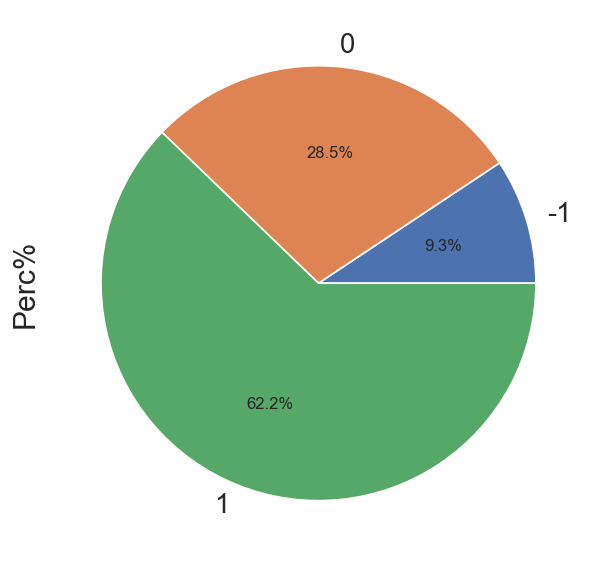

In [56]:

plot = sentiment_dist_5.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [57]:
dominant_topic_us_5.shape

(157, 5)

In [58]:
dominant_topic_us_6 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 12]

dominant_topic_us_6['Perc%'] = 100 * dominant_topic_us_6['Count']/ dominant_topic_us_6['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 54'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_6,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-58-2e11a4f022b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_6['Perc%'] = 100 * dominant_topic_us_6['Count']/ dominant_topic_us_6['Count'].sum()


In [59]:
dominant_topic_us_6.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
950    California            12     1          3875   7.118974
7470   New York              12     1          3530   6.485156
2090   Florida               12     1          2203   4.047252
949    California            12     0          1961   3.602660
10195  Texas                 12     1          1938   3.560406
948    California            12    -1          1764   3.240741
7469   New York              12     0          1520   2.792475
1862   District of Columbia  12     1          1295   2.379115
7468   New York              12    -1          1245   2.287257
2089   Florida               12     0          1133   2.081496

In [60]:
sentiment_dist_6 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 12].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_6 = sentiment_dist_6.set_index('Sentiment')



In [61]:
sentiment_dist_6['Perc%'] = 100 * sentiment_dist_6['Count']/ sentiment_dist_6['Count'].sum()

sentiment_dist_6.head()

Topic  Count      Perc%
Sentiment                         
-1         636    10833  19.901896
 0         648    14266  26.208848
 1         648    29333  53.889256

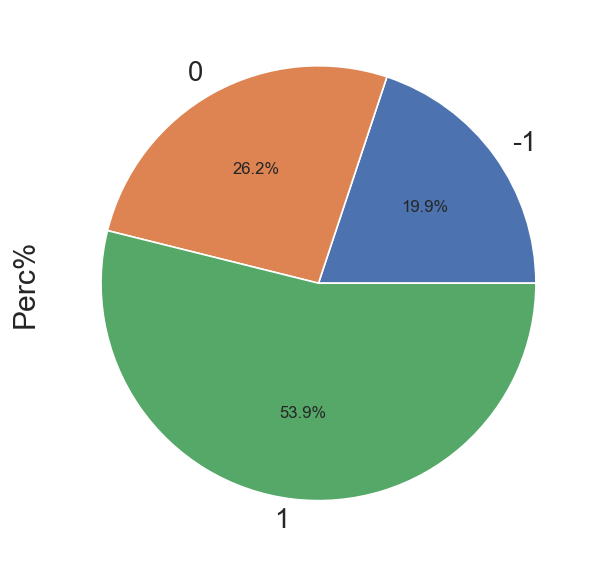

In [62]:

plot = sentiment_dist_6.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [63]:
dominant_topic_us_7 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 5]

dominant_topic_us_7['Perc%'] = 100 * dominant_topic_us_7['Count']/ dominant_topic_us_7['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 30'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_7,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-63-64e93c85edc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_7['Perc%'] = 100 * dominant_topic_us_7['Count']/ dominant_topic_us_7['Count'].sum()


In [64]:
dominant_topic_us_7.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
927    California            5     -1          2767   5.562033
7447   New York              5     -1          2550   5.125834
928    California            5      0          2194   4.410228
7448   New York              5      0          2074   4.169012
929    California            5      1          2045   4.110718
7449   New York              5      1          1758   3.533810
10172  Texas                 5     -1          1322   2.657393
1839   District of Columbia  5     -1          1190   2.392056
2067   Florida               5     -1          991    1.992040
4939   Massachusetts         5     -1          942    1.893543

In [65]:
sentiment_dist_7 =tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 5].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_7 = sentiment_dist_7.set_index('Sentiment')

In [66]:
sentiment_dist_7['Perc%'] = 100 * sentiment_dist_7['Count']/ sentiment_dist_7['Count'].sum()

sentiment_dist_7.head()

Topic  Count      Perc%
Sentiment                         
-1         265    20181  40.566455
 0         260    15098  30.348959
 1         265    14469  29.084586

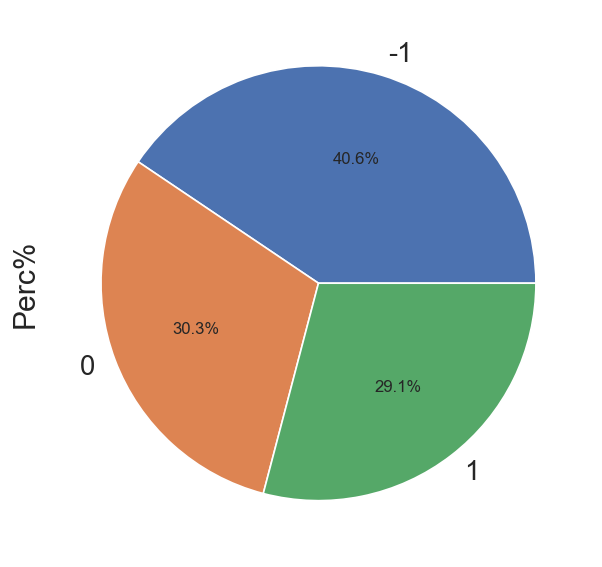

In [67]:

plot = sentiment_dist_7.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [68]:
dominant_topic_us_8 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 25]

dominant_topic_us_8['Perc%'] = 100 * dominant_topic_us_8['Count']/ dominant_topic_us_8['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 8'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_8,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-68-0680966024b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_8['Perc%'] = 100 * dominant_topic_us_8['Count']/ dominant_topic_us_8['Count'].sum()


In [69]:
dominant_topic_us_8.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
7509   New York              25     1          3432   7.094134
989    California            25     1          3222   6.660052
7508   New York              25     0          2900   5.994460
988    California            25     0          2867   5.926247
1901   District of Columbia  25     1          1738   3.592542
1900   District of Columbia  25     0          1557   3.218405
5001   Massachusetts         25     1          1219   2.519740
10234  Texas                 25     1          1145   2.366778
987    California            25    -1          1122   2.319236
10233  Texas                 25     0          1096   2.265493

In [70]:
sentiment_dist_8 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 25].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_8 = sentiment_dist_8.set_index('Sentiment')



In [71]:
sentiment_dist_8['Perc%'] = 100 * sentiment_dist_8['Count']/ sentiment_dist_8['Count'].sum()

sentiment_dist_8.head()


Topic  Count      Perc%
Sentiment                         
-1         1325   7216   14.915871
 0         1325   19118  39.517963
 1         1325   22044  45.566166

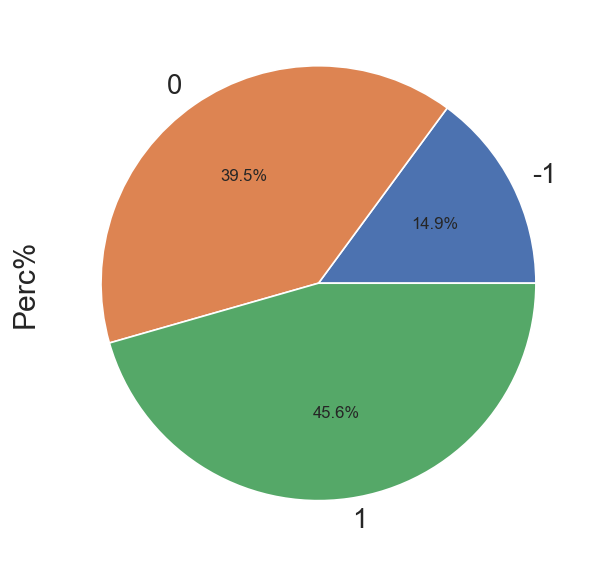

In [72]:

plot = sentiment_dist_8.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [73]:
dominant_topic_us_9 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 9]

dominant_topic_us_9['Perc%'] = 100 * dominant_topic_us_9['Count']/ dominant_topic_us_9['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 3'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_9,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-73-a7a486c989ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_9['Perc%'] = 100 * dominant_topic_us_9['Count']/ dominant_topic_us_9['Count'].sum()


In [74]:
dominant_topic_us_9.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
941    California            9      1          3776   7.815378
7461   New York              9      1          2231   4.617614
940    California            9      0          2123   4.394081
939    California            9     -1          1864   3.858015
10186  Texas                 9      1          1652   3.419228
1853   District of Columbia  9      1          1618   3.348856
2081   Florida               9      1          1467   3.036324
7460   New York              9      0          1397   2.891442
8824   Pennsylvania          9      1          1213   2.510607
7459   New York              9     -1          1140   2.359516

In [75]:
sentiment_dist_9 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 9].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_9 = sentiment_dist_9.set_index('Sentiment')



In [76]:
sentiment_dist_9['Perc%'] = 100 * sentiment_dist_9['Count']/ sentiment_dist_9['Count'].sum()

sentiment_dist_9.head()

Topic  Count      Perc%
Sentiment                         
-1         477    10780  22.311911
 0         486    13257  27.438684
 1         468    24278  50.249405

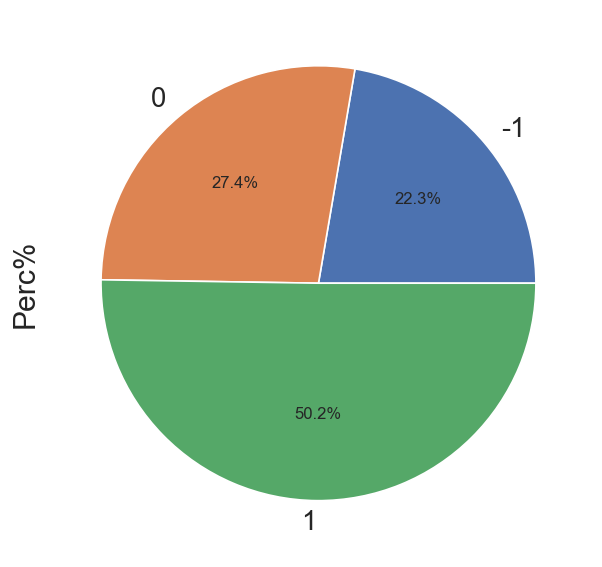

In [77]:

plot = sentiment_dist_9.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [78]:
dominant_topic_us_10 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 20]

dominant_topic_us_10['Perc%'] = 100 * dominant_topic_us_10['Count']/ dominant_topic_us_10['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 2'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_10,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-78-7b93918b9569>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_10['Perc%'] = 100 * dominant_topic_us_10['Count']/ dominant_topic_us_10['Count'].sum()


In [79]:
dominant_topic_us_10.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
974    California            20     1          3704   7.917914
7494   New York              20     1          2596   5.549380
1886   District of Columbia  20     1          2168   4.634459
10219  Texas                 20     1          1636   3.497221
973    California            20     0          1613   3.448055
972    California            20    -1          1424   3.044036
2114   Florida               20     1          1301   2.781103
7493   New York              20     0          1272   2.719111
4986   Massachusetts         20     1          1128   2.411287
8857   Pennsylvania          20     1          1100   2.351432

In [80]:
sentiment_dist_10 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 20].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_10 = sentiment_dist_10.set_index('Sentiment')



In [81]:
sentiment_dist_10['Perc%'] = 100 * sentiment_dist_10['Count']/ sentiment_dist_10['Count'].sum()

sentiment_dist_10.head()


Topic  Count      Perc%
Sentiment                         
-1         1060   8793   18.796494
 0         1040   12317  26.329628
 1         1060   25670  54.873878

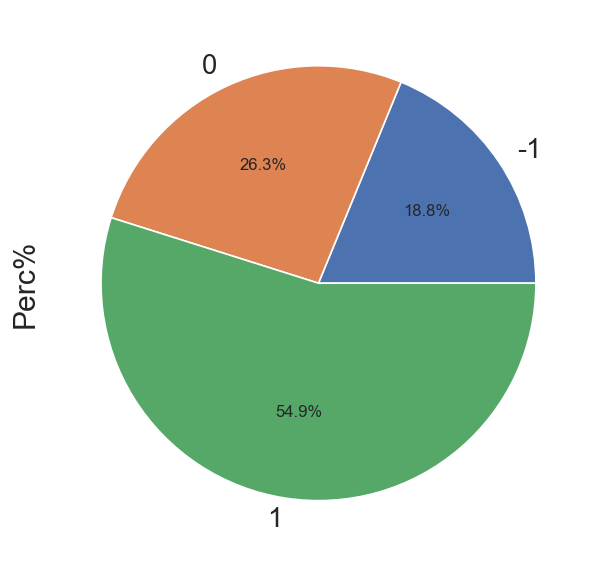

In [82]:

plot = sentiment_dist_10.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [83]:
dominant_topic_us_11 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 15]

dominant_topic_us_11['Perc%'] = 100 * dominant_topic_us_11['Count']/ dominant_topic_us_11['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 0'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_11,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-83-37bae0fb2d4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_11['Perc%'] = 100 * dominant_topic_us_11['Count']/ dominant_topic_us_11['Count'].sum()


In [84]:
dominant_topic_us_11.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
957    California            15    -1          2681   5.799515
7477   New York              15    -1          2180   4.715757
7478   New York              15     0          2177   4.709267
959    California            15     1          1995   4.315566
958    California            15     0          1794   3.880765
7479   New York              15     1          1776   3.841827
2097   Florida               15    -1          1118   2.418448
1869   District of Columbia  15    -1          1013   2.191313
10202  Texas                 15    -1          1003   2.169681
2099   Florida               15     1          986    2.132906

In [85]:
sentiment_dist_11 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 15].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_11 = sentiment_dist_11.set_index('Sentiment')



In [86]:
sentiment_dist_11['Perc%'] = 100 * sentiment_dist_11['Count']/ sentiment_dist_11['Count'].sum()

sentiment_dist_11.head()


Topic  Count      Perc%
Sentiment                         
-1         795    17707  38.303626
 0         795    13451  29.097084
 1         795    15070  32.599290

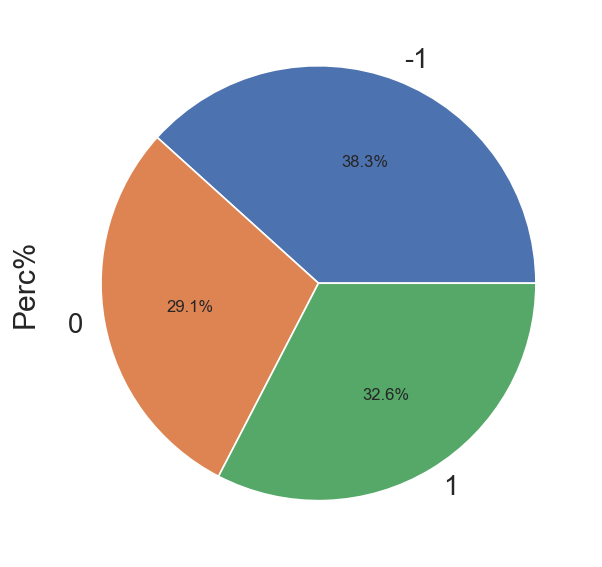

In [87]:

plot = sentiment_dist_11.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [132]:
dominant_topic_us_12 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 12]

dominant_topic_us_12['Perc%'] = 100 * dominant_topic_us_12['Count']/ dominant_topic_us_12['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 19'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_12,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-132-fe463589bfca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_12['Perc%'] = 100 * dominant_topic_us_12['Count']/ dominant_topic_us_12['Count'].sum()


In [133]:
dominant_topic_us_12.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
950    California            12     1          3875   7.118974
7470   New York              12     1          3530   6.485156
2090   Florida               12     1          2203   4.047252
949    California            12     0          1961   3.602660
10195  Texas                 12     1          1938   3.560406
948    California            12    -1          1764   3.240741
7469   New York              12     0          1520   2.792475
1862   District of Columbia  12     1          1295   2.379115
7468   New York              12    -1          1245   2.287257
2089   Florida               12     0          1133   2.081496

In [134]:
sentiment_dist_12 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 12].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_12 = sentiment_dist_12.set_index('Sentiment')



In [135]:
sentiment_dist_12['Perc%'] = 100 * sentiment_dist_12['Count']/ sentiment_dist_12['Count'].sum()

sentiment_dist_12.head()


Topic  Count      Perc%
Sentiment                         
-1         636    10833  19.901896
 0         648    14266  26.208848
 1         648    29333  53.889256

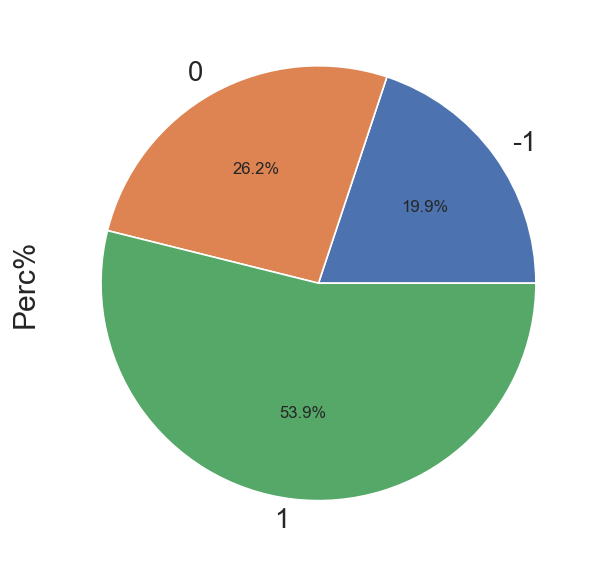

In [136]:

plot = sentiment_dist_12.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [93]:
dominant_topic_us_13 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 65]

dominant_topic_us_13['Perc%'] = 100 * dominant_topic_us_13['Count']/ dominant_topic_us_13['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 44'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_13,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-93-3d8e3e3ce530>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_13['Perc%'] = 100 * dominant_topic_us_13['Count']/ dominant_topic_us_13['Count'].sum()


In [94]:
dominant_topic_us_13.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1109   California     65     1          2878   6.457258
7629   New York       65     1          2673   5.997308
1108   California     65     0          2192   4.918106
7628   New York       65     0          1971   4.422257
10354  Texas          65     1          1258   2.822526
1107   California     65    -1          1220   2.737267
7627   New York       65    -1          1209   2.712587
2249   Florida        65     1          1124   2.521876
10353  Texas          65     0          1082   2.427642
5121   Massachusetts  65     1          1025   2.299753

In [95]:
sentiment_dist_13 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 65].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_13 = sentiment_dist_13.set_index('Sentiment')



In [96]:
sentiment_dist_13['Perc%'] = 100 * sentiment_dist_13['Count']/ sentiment_dist_13['Count'].sum()

sentiment_dist_13.head()


Topic  Count      Perc%
Sentiment                         
-1         3445   8857   19.872111
 0         3445   16085  36.089298
 1         3445   19628  44.038591

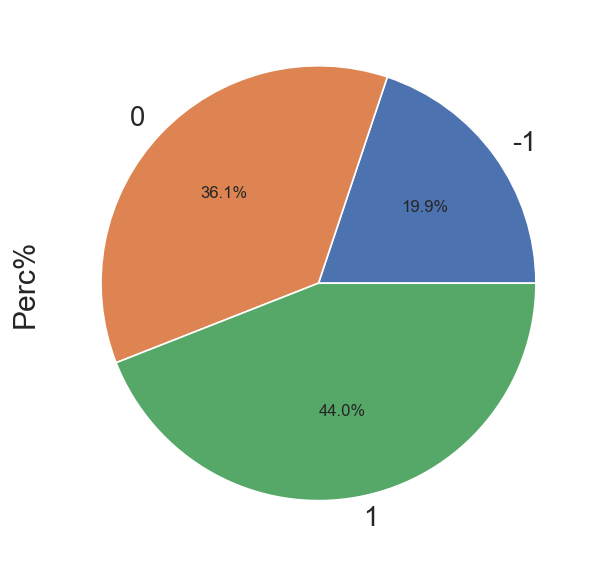

In [97]:

plot = sentiment_dist_13.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [98]:
dominant_topic_us_14 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 19]

dominant_topic_us_14['Perc%'] = 100 * dominant_topic_us_14['Count']/ dominant_topic_us_14['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 70'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_14,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-98-0c4db3eeaedf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_14['Perc%'] = 100 * dominant_topic_us_14['Count']/ dominant_topic_us_14['Count'].sum()


In [99]:
dominant_topic_us_14.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
971    California            19     1          4342   9.736736
7491   New York              19     1          3647   8.178230
10216  Texas                 19     1          1763   3.953447
2111   Florida               19     1          1506   3.377136
1883   District of Columbia  19     1          1496   3.354711
7490   New York              19     0          1479   3.316590
969    California            19    -1          1475   3.307620
970    California            19     0          1464   3.282953
4983   Massachusetts         19     1          1099   2.464457
3159   Illinois              19     1          1099   2.464457

In [100]:
sentiment_dist_14 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 19].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_14.set_index('Sentiment')




In [101]:
sentiment_dist_14['Perc%'] = 100 * sentiment_dist_14['Count']/ sentiment_dist_14['Count'].sum()

sentiment_dist_14.head()

Topic  Count      Perc%
Sentiment                         
-1         1007   7664   17.186169
 0         988    9423   21.130645
 1         1007   27507  61.683186

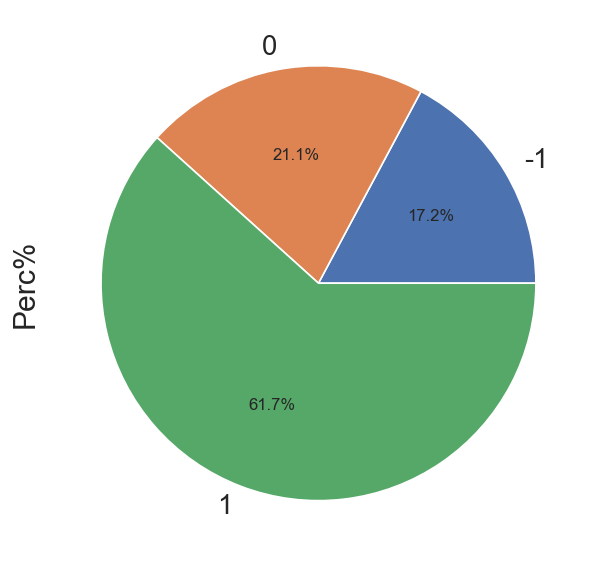

In [102]:

plot = sentiment_dist_14.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [103]:
dominant_topic_us_15 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 6]

dominant_topic_us_15['Perc%'] = 100 * dominant_topic_us_15['Count']/ dominant_topic_us_15['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 60'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_15,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-103-ba7a1aae4172>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_15['Perc%'] = 100 * dominant_topic_us_15['Count']/ dominant_topic_us_15['Count'].sum()


In [104]:
dominant_topic_us_15.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
932    California            6      1          2733   6.091608
931    California            6      0          2045   4.558119
7452   New York              6      1          1848   4.119024
7451   New York              6      0          1628   3.628664
10177  Texas                 6      1          1316   2.933244
1844   District of Columbia  6      1          1197   2.668004
930    California            6     -1          1183   2.636799
7450   New York              6     -1          1159   2.583305
2072   Florida               6      1          1146   2.554330
10176  Texas                 6      0          1141   2.543185

In [105]:
sentiment_dist_15 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 6].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_15 = sentiment_dist_16.set_index('Sentiment')


In [106]:
sentiment_dist_15['Perc%'] = 100 * sentiment_dist_15['Count']/ sentiment_dist_15['Count'].sum()

sentiment_dist_15.head()


Topic  Count      Perc%
Sentiment                         
-1         312    9074   20.225120
 0         318    16346  36.433746
 1         318    19445  43.341135

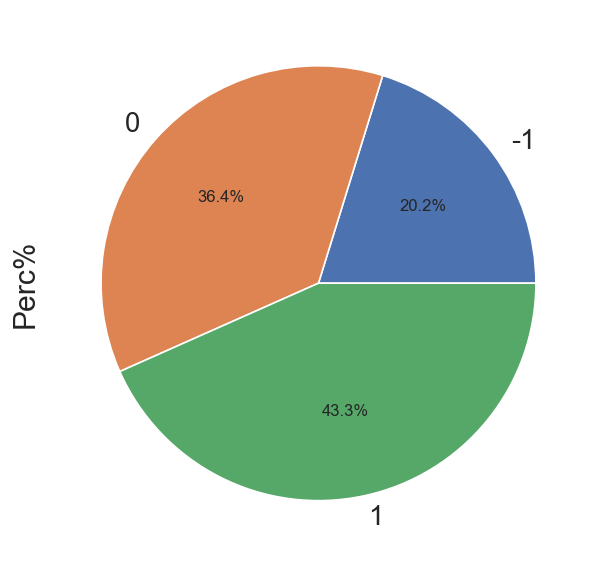

In [107]:

plot = sentiment_dist_15.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [108]:
dominant_topic_us_16 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 55]

dominant_topic_us_16['Perc%'] = 100 * dominant_topic_us_16['Count']/ dominant_topic_us_16['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 27'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_16,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-108-8c2689bfa9ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_16['Perc%'] = 100 * dominant_topic_us_16['Count']/ dominant_topic_us_16['Count'].sum()


In [109]:
dominant_topic_us_16.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1079   California            55     1          4293   9.762365
7599   New York              55     1          2729   6.205799
2219   Florida               55     1          2054   4.670836
10324  Texas                 55     1          1998   4.543491
1078   California            55     0          1583   3.599773
3267   Illinois              55     1          1116   2.537806
1077   California            55    -1          1069   2.430927
7598   New York              55     0          1023   2.326322
8962   Pennsylvania          55     1          1016   2.310404
1991   District of Columbia  55     1          949    2.158044

In [110]:
sentiment_dist_16 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 55].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_16 = sentiment_dist_16.set_index('Sentiment')



In [111]:
sentiment_dist_16['Perc%'] = 100 * sentiment_dist_16['Count']/ sentiment_dist_16['Count'].sum()

sentiment_dist_16.head()


Topic  Count      Perc%
Sentiment                         
-1         2915   6660   15.144969
 0         2860   10170  23.126777
 1         2915   27145  61.728255

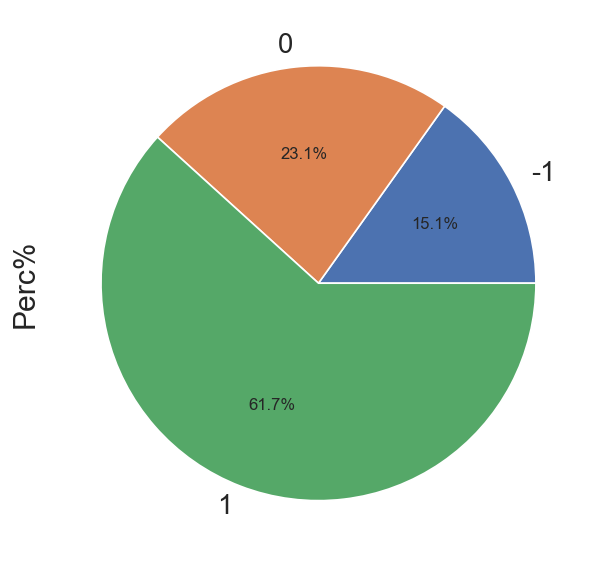

In [112]:

plot = sentiment_dist_16.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [113]:
dominant_topic_us_17 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 74]

dominant_topic_us_17['Perc%'] = 100 * dominant_topic_us_17['Count']/ dominant_topic_us_17['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 50'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_17,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-113-87c0adc6c304>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_17['Perc%'] = 100 * dominant_topic_us_17['Count']/ dominant_topic_us_17['Count'].sum()


In [114]:
dominant_topic_us_17.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count      Perc%
1136   California            74     1          4685   10.917946
7656   New York              74     1          3450   8.039897 
2048   District of Columbia  74     1          2223   5.180490 
10381  Texas                 74     1          1630   3.798560 
2276   Florida               74     1          1315   3.064482 
1135   California            74     0          1293   3.013213 
5148   Massachusetts         74     1          1259   2.933980 
7655   New York              74     0          1129   2.631027 
3324   Illinois              74     1          1074   2.502855 
9019   Pennsylvania          74     1          1047   2.439934

In [115]:
sentiment_dist_17 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 74].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_17 = sentiment_dist_2.set_index('Sentiment')


In [116]:
sentiment_dist_17['Perc%'] = 100 * sentiment_dist_17['Count']/ sentiment_dist_17['Count'].sum()

sentiment_dist_17.head()


Topic  Count      Perc%
Sentiment                         
-1         3922   5538   12.905782
 0         3848   8924   20.796532
 1         3922   28449  66.297686

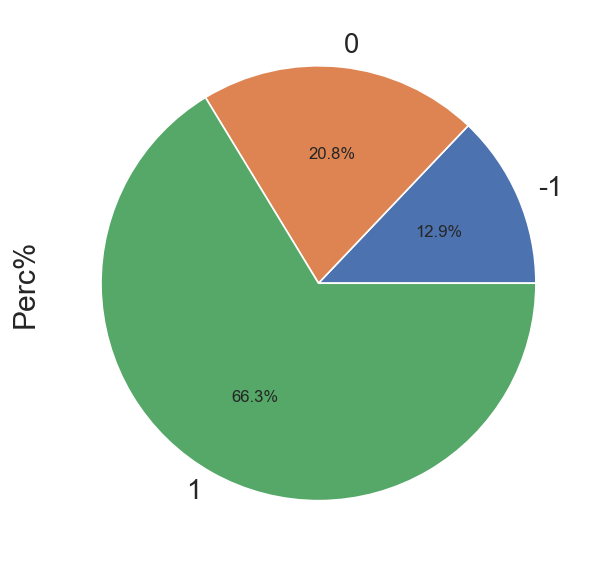

In [117]:

plot = sentiment_dist_17.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [118]:
dominant_topic_us_18 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 63]

dominant_topic_us_18['Perc%'] = 100 * dominant_topic_us_18['Count']/ dominant_topic_us_18['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 7'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_18,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-118-a7f90575873e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_18['Perc%'] = 100 * dominant_topic_us_18['Count']/ dominant_topic_us_18['Count'].sum()


In [119]:
dominant_topic_us_18.sort_values(by=['Count'], ascending=False).head(10)
# sentiment_dist_3 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 67].groupby(["Sentiment"]).agg('sum')
# # sentiment_dist_3 = sentiment_dist_2.set_index('Sentiment')


# sentiment_dist_3['Perc%'] = 100 * sentiment_dist_3['Count']/ sentiment_dist_3['Count'].sum()

# sentiment_dist_3.head()


# plot = sentiment_dist_3.plot.pie(y='Perc%',figsize=(11, 6))

State  Topic  Sentiment  Count     Perc%
1103   California            63     1          3025   7.024103
1102   California            63     0          2459   5.709841
7623   New York              63     1          1976   4.588306
7622   New York              63     0          1763   4.093717
2243   Florida               63     1          1356   3.148656
10348  Texas                 63     1          1348   3.130079
1101   California            63    -1          1262   2.930386
2242   Florida               63     0          1064   2.470626
2015   District of Columbia  63     1          1052   2.442762
10347  Texas                 63     0          1015   2.356848

In [120]:
sentiment_dist_18 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 63].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_18.set_index('Sentiment')


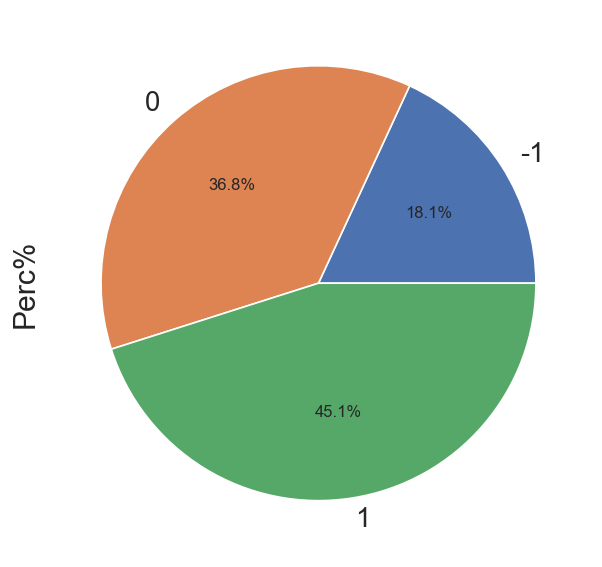

In [121]:
sentiment_dist_18['Perc%'] = 100 * sentiment_dist_18['Count']/ sentiment_dist_18['Count'].sum()

plot = sentiment_dist_18.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [122]:
dominant_topic_us_19 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 60]

dominant_topic_us_19['Perc%'] = 100 * dominant_topic_us_19['Count']/ dominant_topic_us_19['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 73'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_19,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-122-9f13303a6ec3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_19['Perc%'] = 100 * dominant_topic_us_19['Count']/ dominant_topic_us_19['Count'].sum()


In [123]:
dominant_topic_us_19.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1094   California            60     1          3766   8.873704
2006   District of Columbia  60     1          2720   6.409048
7614   New York              60     1          2590   6.102733
1092   California            60    -1          2117   4.988219
1093   California            60     0          1932   4.552309
7612   New York              60    -1          1169   2.754477
2234   Florida               60     1          1167   2.749764
10339  Texas                 60     1          1059   2.495287
2005   District of Columbia  60     0          1058   2.492931
8977   Pennsylvania          60     1          977    2.302074

In [124]:
sentiment_dist_19 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 60].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_19 = sentiment_dist_19.set_index('Sentiment')



In [125]:
sentiment_dist_19['Perc%'] = 100 * sentiment_dist_19['Count']/ sentiment_dist_19['Count'].sum()

sentiment_dist_19.head()



Topic  Count      Perc%
Sentiment                         
-1         3120   10924  25.739868
 0         3180   9180   21.630537
 1         3180   22336  52.629595

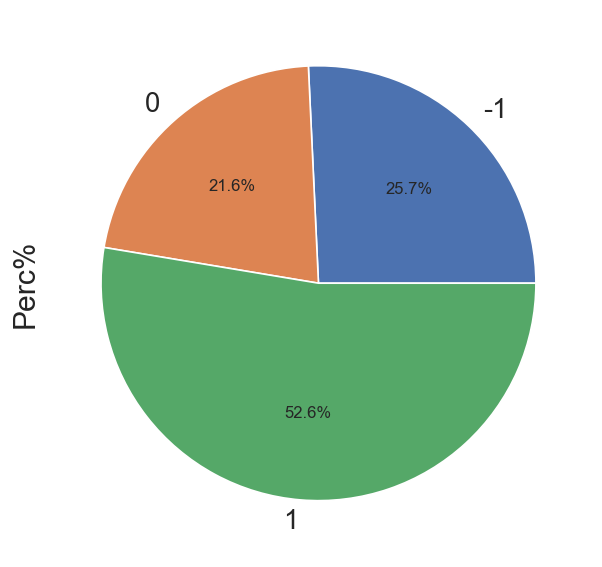

In [126]:
plot = sentiment_dist_19.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))

In [127]:
dominant_topic_us_20 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 61]

dominant_topic_us_20['Perc%'] = 100 * dominant_topic_us_20['Count']/ dominant_topic_us_20['Count'].sum()

topic_1_country = folium.Map()

loc = 'US COVID-19 August 2020 Dominant Topic Distribution - Topic 9'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=us_states_shapes,
    data= dominant_topic_us_20,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['State','Count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white'
).add_to(topic_1_country)

topic_1_country.get_root().html.add_child(folium.Element(title_html))

topic_1_country

<ipython-input-127-a2fb195ac9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_topic_us_20['Perc%'] = 100 * dominant_topic_us_20['Count']/ dominant_topic_us_20['Count'].sum()


In [128]:
dominant_topic_us_20.sort_values(by=['Count'], ascending=False).head(10)


State  Topic  Sentiment  Count     Perc%
1096   California            61     0          3644   8.705000
1097   California            61     1          2401   5.735649
7616   New York              61     0          2240   5.351043
7617   New York              61     1          1476   3.525955
2236   Florida               61     0          1397   3.337235
10341  Texas                 61     0          1335   3.189126
1095   California            61    -1          1270   3.033850
2237   Florida               61     1          957    2.286137
10342  Texas                 61     1          923    2.204916
2008   District of Columbia  61     0          775    1.851365

In [129]:
sentiment_dist_20 = tm_geolocation_analysis_state_us_count_by_topic_df.loc[tm_geolocation_analysis_state_us_count_by_topic_df['Topic'] == 61].groupby(["Sentiment"]).agg('sum')
# sentiment_dist_20 = sentiment_dist_20.set_index('Sentiment')



In [130]:
sentiment_dist_20['Perc%'] = 100 * sentiment_dist_20['Count']/ sentiment_dist_20['Count'].sum()

sentiment_dist_20.head()


Topic  Count      Perc%
Sentiment                         
-1         3172   7185   17.163947
 0         3233   19758  47.199064
 1         3233   14918  35.636989

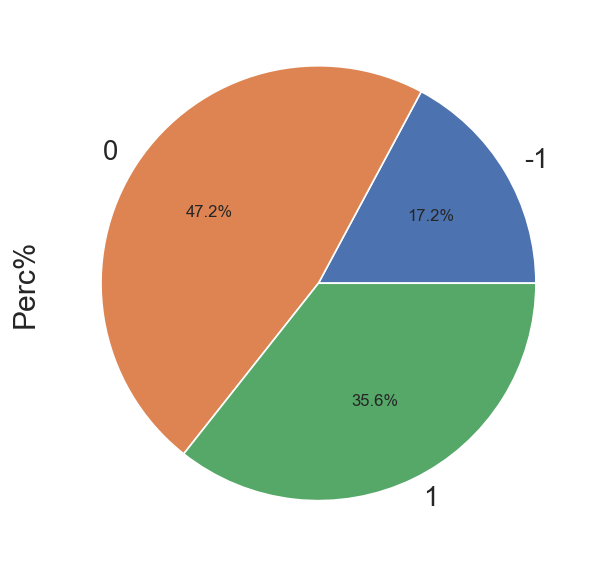

In [131]:
plot = sentiment_dist_20.plot.pie(y='Perc%',figsize=(11, 6), legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.0))